In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1 id="h1" style="color:white;background:skyblue;padding:8px;"> Wine Quality Classification </h1>

#### https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

## Columns
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
**12 - quality (score between 0 and 10)**   => Target

In [ ]:
data = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.describe()

# 1. EDA & Preprocessing

In [ ]:
data = data.drop(['Id'], axis = 1)

### Profiling
#### You can check Data Overview, Variables, Interactions, Correlations, Missing Values, Sample, Duplicate rows.
#### By Toggle Details, you can check out the histogram of each feature.

For specific EDA...

## a) Outliers Checking (feat. IQR)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

[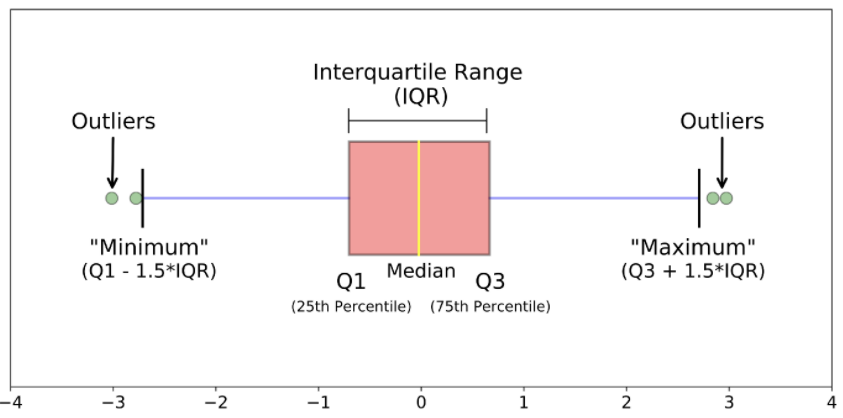](http://)

In [ ]:
df = data.copy()

In [ ]:
fig,ax=plt.subplots(6,2,figsize=(15,30))
sns.countplot(x=df.quality,ax=ax[0][0]).set_title('Target Count',size=15)
sns.boxplot(x=df.quality,y=df['fixed acidity'],ax=ax[0][1])
sns.boxplot(x=df.quality,y=df['citric acid'],ax=ax[1][0])
sns.boxplot(x=df.quality,y=df['residual sugar'],ax=ax[1][1])
sns.boxplot(x=df.quality,y=df['chlorides'],ax=ax[2][0])
sns.boxplot(x=df.quality,y=df['free sulfur dioxide'],ax=ax[2][1])
sns.boxplot(x=df.quality,y=df['total sulfur dioxide'],ax=ax[3][0])
sns.boxplot(x=df.quality,y=df['density'],ax=ax[3][1])
sns.boxplot(x=df.quality,y=df['pH'],ax=ax[4][0])
sns.boxplot(x=df.quality,y=df['sulphates'],ax=ax[4][1])
sns.boxplot(x=df.quality,y=df['alcohol'],ax=ax[5][0])
sns.boxplot(x=df.quality,y=df['volatile acidity'],ax=ax[5][1])

In [ ]:
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    #print(outlier_idx)
    return outlier_idx

In [ ]:
# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=data, column='quality', weight=1.5)
data.drop(outlier_idx, axis=0, inplace=True)

In [ ]:
data.info()

## b) Correlation

In [ ]:
corr = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=0.1, annot_kws={"fontsize":20})
plt.title("Correlation of Features")

#### fixed acidity & citric acid are related with each other
#### fixed acidity & density are related with each other
#### free sulfur dioxide & total sulfur dioxide are related with each other

## c) Scaling

### "Numerical Data Normalization."

* As "tree-based models" such as decision trees and random forests are distinguished by size comparison, they are not significantly affected by the unit of numbers.
* However, "smooth function models" such as Logic Regression, Lasso, etc. are heavily influenced by the size and unit of the number.

#### Therefore, we have to create data that fits with all models through numerical data normalization.

* Among the various numerical data normalization methods, the "Min Max Scaling" technique is fairly simple.
* The smallest value is 0, and the largest value is 1.
* And the values in between are distributed between 0 and 1, depending on the ratio.

### ⚠ MinMaxScaler is sensitive to Outliers, so we should minimize outliers before!! ⚠

In [ ]:
X = data.drop(['quality'], axis = 1)
y = data['quality']

In [ ]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(X)

In [ ]:
df = pd.DataFrame(data_scaled, columns=X.columns)
df

# 2. Modeling

### KNN Classification

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighbors#sklearn.neighbors.KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')
knn.fit(X_train, y_train)

In [ ]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
print('Misclassified: %d' %(y_train!=y_train_pred).sum())
print('Misclassified: %d' %(y_test!=y_test_pred).sum())

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

In [ ]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)
plt.title('Confusion Matrix')